# Exercises  "Lecture 10: Clustering"

In this set of exercises, we will use clustering to group the wikipedia articles into 16 clusters. Since we are working on clustering (unsupervised machine learning),  we will ignore the labels (the category of the article) when training. We will use them however to evaluate the trained model (intrinsic evaluation).


The exercises cover the following points:

* Storing the data into a pandas dataframe and inspecting the data
* Learning a clustering model from the data 
* Inspecting the output clusters

Data: wkp_sorted.zip      

Python libraries
- sklearn.datasets to load data 
- pandas
- numpy unique method to remove duplicate   

Cheat sheets
- 10_CS_clustering.ipynb


##  Loading the Data into a Dataframe

**Exercise 1** 

* Create a pandas dataframe containing two columns one for the text and one for the category of each Wikipedia article included in  "data/wkp_sorted/". 
* Use sklearn.datasets load_files method (cf. **clustering CS**) 

Expected output:

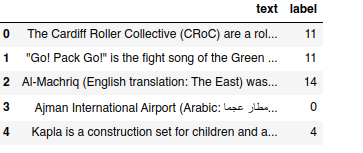

In [33]:
##Prints 'label'(category) as text
import os
import pandas as pd

# Define the path to the 'wkp_sorted' folder
DATA_DIR = r'C:\Users\Ahana\OneDrive\Desktop\wkp_sorted'

# Initialize lists to store text and labels
texts = []
labels = []

# Loop through each folder inside 'wkp_sorted'
for root, dirs, files in os.walk(DATA_DIR):
    for file in files:
        # Check if the file is a text file
        if file.endswith('.txt'):
            # Read the contents of the text file
            with open(os.path.join(root, file), 'r', encoding="utf-8", errors="replace") as f:
                text = f.read()
            # Append the text content to the list
            texts.append(text)
            # Append the label (folder name) to the list
            labels.append(os.path.basename(root))

# Create a DataFrame from the collected data
df = pd.DataFrame({'text': texts, 'label': labels})

# Optionally, you can inspect the dataframe
df

,text,label
0,Airports of Serbia (Serbian Cyrillic: Аеродром...,Airports
1,An airport authority is an independent entity ...,Airports
2,"An airport bus, or airport shuttle bus or airp...",Airports
3,Airport check-in is the process whereby passen...,Airports
4,Airport security refers to the techniques and ...,Airports
...,...,...
155,"Al-Wasat (Arabic: الوسط), also Alwasat, was an...",Written_communication
156,"The Burj Al Arab (Arabic: برج العرب, Tower of ...",Written_communication
157,Al-Fazl ( Urdu الفضل) has been the most import...,Written_communication
158,"Al HaMishmar (Hebrew: על המשמר, On Guard) was ...",Written_communication


In [34]:
##Prints 'label'(category) as unique numbers

import os
import pandas as pd

# Define the path to the 'wkp_sorted' folder
DATA_DIR = "wkp_sorted/"

# Initialize lists to store text and labels
texts = []
labels = []

# Create a dictionary to map labels to integers
label_map = {}

# Loop through each folder inside 'wkp_sorted'
for i, (root, dirs, files) in enumerate(os.walk(DATA_DIR)):
    for file in files:
        # Check if the file is a text file
        if file.endswith('.txt'):
            # Read the contents of the text file
            with open(os.path.join(root, file), 'r', encoding="utf-8", errors="replace") as f:
                text = f.read()
            # Append the text content to the list
            texts.append(text)
            # Append the label (folder name) to the list
            label = os.path.basename(root)
            labels.append(label)
            # Map label to integer index if it's not already mapped
            if label not in label_map:
                label_map[label] = len(label_map)

# Convert labels to integer indices using label_map
label_indices = [label_map[label] for label in labels]

# Create a DataFrame from the collected data
df = pd.DataFrame({'text': texts, 'label': label_indices})

# Optionally, you can inspect the dataframe
print(df.head())

# Optionally, you can also print the label map
print(label_map)


                                                text  label
0  Airports of Serbia (Serbian Cyrillic: Аеродром...      0
1  An airport authority is an independent entity ...      0
2  An airport bus, or airport shuttle bus or airp...      0
3  Airport check-in is the process whereby passen...      0
4  Airport security refers to the techniques and ...      0
{'Airports': 0, 'Artists': 1, 'Astronauts': 2, 'Astronomical_objects': 3, 'Building': 4, 'City': 5, 'Comics_characters': 6, 'Companies': 7, 'Foods': 8, 'Monuments_and_memorials': 9, 'Politicians': 10, 'Sportspeople': 11, 'Sports_teams': 12, 'Transport': 13, 'Universities_and_colleges': 14, 'Written_communication': 15}


In [ ]:
#Kevin's version
data = {"text":[], "cat":[]}
dirpath = fr"{dp}/wkp-sorted" #dp=absolute path
results = os.scandir(dirpath)
cat2id = {cat:i for i,cat in enumerate(results)}
results = os.scandir(dirpath)
for r in results:
    if r.is_dir:
        results2 = os.scandir(r.path)
        for r2 in results2:
            with open(r2.path, encoding="utf-8")as f:
                text = f.read()
            data["text"].append(text)
            data["cat"].append(r.name)

**Exercise 2**  

* Add a new column to your dataframe with header "Headers" in which you include the headers extracted from the texts
* Use the code you developed in Exercise 3 of 10_Exercise_sheet_stats.ipynb

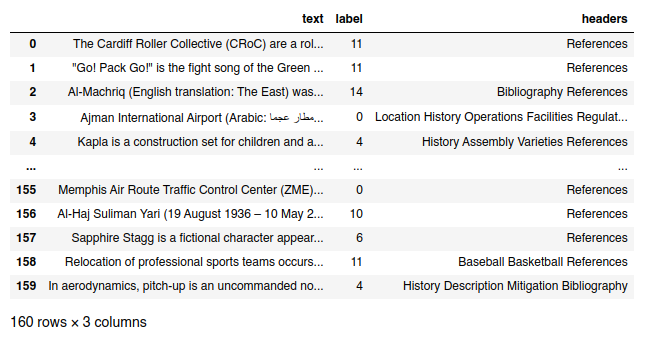

In [35]:
import re

def get_title(text):
    pattern = re.compile(r'(==)(.+)(==)')
    result = re.search(pattern, text)
    return result.group(2)

headers = df['text'].apply(get_title)

df = pd.concat([df, headers.rename('headers')], axis=1)
print(df)

                                                  text  label  \
0    Airports of Serbia (Serbian Cyrillic: Аеродром...      0   
1    An airport authority is an independent entity ...      0   
2    An airport bus, or airport shuttle bus or airp...      0   
3    Airport check-in is the process whereby passen...      0   
4    Airport security refers to the techniques and ...      0   
..                                                 ...    ...   
155  Al-Wasat (Arabic: الوسط), also Alwasat, was an...     15   
156  The Burj Al Arab (Arabic: برج العرب, Tower of ...     15   
157  Al-Fazl ( Urdu الفضل) has been the most import...     15   
158  Al HaMishmar (Hebrew: על המשמר, On Guard) was ...     15   
159  Al Muharrir (Arabic: المُحَرِّر meaning the Li...     15   

                                               headers  
0                                            Airports   
1     Examples of airport authorities overseeing mu...  
2                                 On airport tra

**Exercise 3** 

* How many articles are there ? Use the dataframe shape attribute which outputs the shape (nb of rows and columns) of a dataframe.

Expected answer: (160,2) 

In [36]:
df.shape

(160, 3)

**Exercise 4** 

* How many labels (categories) are there ?
* Use numpy unique method (cf. numpy CS)

Expected answer: 16

In [37]:
df.label.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

**Exercise 5** 

* How many articles per category ?
* Use pandas 'groupby' and 'size' methods (cf. Pandas CS)

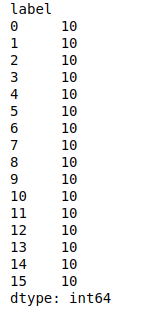

In [38]:
df.groupby('label').size()

label
0     10
1     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
9     10
10    10
11    10
12    10
13    10
14    10
15    10
dtype: int64

**Exercise 6** 

* Don't forget to shuffle the data (Cf. pandas CS)

In [39]:
df = df.sample(frac = 1)
df

,text,label,headers
48,Roman cement is a substance developed by James...,4,History
159,Al Muharrir (Arabic: المُحَرِّر meaning the Li...,15,History and profile
34,"The Crab Nebula (catalogue designations M1, NG...",3,Observational history
82,Ají is a spicy sauce that often contains tomat...,8,Recipes
65,Gnarrk is a fictional character in DC Comics. ...,6,Fictional character biography
...,...,...,...
154,"Al-Tilmiz (Arabic: التلميذ, 'The Pupil') was a...",15,References
118,Olga Krishtop (Russian: Ольга Криштоп; born 8 ...,11,Achievements
14,"Al Stohlman (August 15, 1919 – March 6, 1998) ...",1,Al Stohlman
17,"Leif Elggren (born 1950, Linköping, Sweden), i...",1,History


## Vectorizing the input texts

$Y$ = the categories (Astronaut, etc.) we are aiming to rediscover. These are **not** used for clustering but they will be used for evaluation

$X$ = the features used for clustering. The features of Wikipedia article is the list of tokens contained in that item. We hope that words can help group the articles into 16 clusters matching the Wikipedia categories.


**Exercise 7** 

* Vectorize the input (X)
* Use sklearn [TfidfVectorizer]( https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) method to turn the Wikipedia articles into a TF-IDF matrix where each row represents a news item, the columns are tokens and the cell contains the tf-idf score of each token.

Three steps
* Import the TfidfVectorizer method from sklearn
* Create a tf-idf vectorizer. The maximum nb of features should be set to 500. Set use_idf to True and stop_words to "english".
* Apply the tfidf_vectorizer.fit_transform method to X to vectorize all input texts

In [40]:
input = df['text']

# import and instantiate the vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# apply the vectorizer to the corpus
tfidf_matrix = vectorizer.fit_transform(input)


**Exercise 8** 

* Print out the features created by the vectorizer (use the get_feature_names() method).

Expected answer: a list of tokens

In [41]:
features = vectorizer.get_feature_names_out()
print(features)

['00' '000' '0002109' ... '馒头' '鳥山' '鳥山晃写真集']


##  Training a K-means clustering model

**Exercise 9**

* Create a K-means object (import KMeans from sklearn.cluster). 
* Set the number of clusters to 16
* Train this object on the tf-idf matrix you created from the data (use the kmeans fit method)

In [42]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=16, init='k-means++', max_iter=300, n_init=5, verbose=0, random_state=3425)
km.fit(tfidf_matrix)


KMeans(n_clusters=16, n_init=5, random_state=3425)

## Inspecting Clustering Results

**Exercise 10** 

* Create a dataframe aligning the clustering results with the news items and their category
* The dataframe should contains 3 columns with headers "Text", "Category" and "Cluster"
* Extract the texts and labels from the dataframe you created from the wikipedia files
* Extract the list of cluster labels produced for each input text by the clustering algorithm (km.labels_)
* Create the required dataframe using these information 

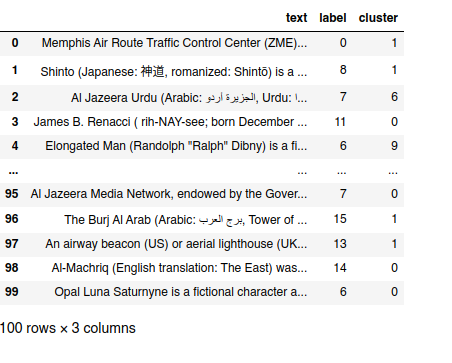

In [43]:
predicted_labels = km.labels_
clusters = predicted_labels.tolist()
cluster = pd.Series(clusters)
df1 = df[["text", "label"]]

df1.merge(cluster.rename('cluster'), left_index=True, right_index=True)              

,text,label,cluster
48,Roman cement is a substance developed by James...,4,1
159,Al Muharrir (Arabic: المُحَرِّر meaning the Li...,15,4
34,"The Crab Nebula (catalogue designations M1, NG...",3,4
82,Ají is a spicy sauce that often contains tomat...,8,6
65,Gnarrk is a fictional character in DC Comics. ...,6,6
...,...,...,...
154,"Al-Tilmiz (Arabic: التلميذ, 'The Pupil') was a...",15,2
118,Olga Krishtop (Russian: Ольга Криштоп; born 8 ...,11,4
14,"Al Stohlman (August 15, 1919 – March 6, 1998) ...",1,1
17,"Leif Elggren (born 1950, Linköping, Sweden), i...",1,4


**Exercise 11** 

* Print out the number of items per clusters
* use pandas value_counts() method

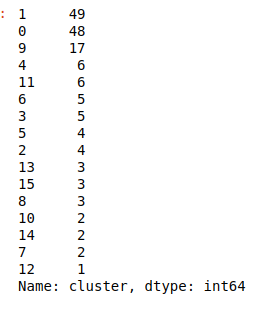

In [44]:
cluster.value_counts()

4     74
1     31
5     10
6      9
2      6
14     5
9      4
13     4
11     4
15     3
12     3
7      2
3      2
8      1
0      1
10     1
Name: count, dtype: int64

**Exercise 12** 

* Evaluate the clusters
* Import metrics from sklearns and compute homogeneity, completeness, v_measure, adjusted rand index and silhouette coefficient
* Print each score out

This should yield something like the following

Homogeneity: 0.207
Completeness: 0.283
V-measure: 0.239
Adjusted Rand-Index: -0.000
Silhouette Coefficient: 0.379


In [45]:
from sklearn import metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(tfidf_matrix, km.labels_, sample_size=1000))

Homogeneity: 0.182
Completeness: 0.270
V-measure: 0.218
Adjusted Rand-Index: -0.006
Silhouette Coefficient: 0.022


**Exercise 13**  

* Print out the top 50 words of each cluster 

Your output should be something like that:

Top terms per cluster:
Cluster 0: references television film notes achievements characterization liability legend historical airports people personal background winners podcasts railair publication properties programs courses exhibitions production filmography architecture miscellaneous advantages plot afl ribbons nrl retired preparation cast baseball basketball subaltern impact uses variations fleet badges vision runaways tenure trial gubernatorial elections conviction execution 52 animation portraits writing regenesis origin novels death hybrid locations memorialization australia athletics founders partnerships academics organization canada history career facilities access security operations cargo passengers regulation location bangladesh iraq antisemitism kuwait syria sudan tunisia libya somalia bahrain algeria malaysia egypt spain india israel categorization 2007 citations 2009 2011 chronology contributors

Cluster 1: references writing controversy doubles distance design description demographics definition death courses cosmogony conviction contributors blazon citations chronology characterization categorization cast cargo career canada brazil economy education egypt elections hybrid honors history historical gubernatorial geography gallery france founders fleet finland filmography film festivals features family facilities exhibitions execution etymology entertainment books biography impact bibliography aftermath afl advantages achievements access academics 52 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 airports algeria alternatives australia beliefs ba

In [46]:
import numpy as np
n_clusters = 16
cluster_centers = km.cluster_centers_
top_n_words = 50
print("Top terms per cluster:")
for i in range(n_clusters):
    print(f"Cluster {i}:")
    cluster_center = cluster_centers[i]
    top_indices = np.argsort(cluster_center)[::-1][:top_n_words]
    top_words = features[top_indices]
    print(" ".join(top_words))
    print()

Top terms per cluster:
Cluster 0:
aladin data atlas sky astronomical vo interactive 143 strasbourg tool de the and allowing sources centre scientifique gnu 33b 2000331 2000a datasets digitized 1051 superimpose arxiv interconnection v3 astrophysics interactively stellarium catalogues heterogeneous aas doi user addressing vizier recherche simbad bibcode cds bonnarel visualizing locating gpl visualisation 0002109 enabler created

Cluster 1:
the of in and he his to was as for is with by at that on her merlin from an renacci victor hogarth lori gnarrk him lin first she st toriyama had chowdhury stagg sheppard mackenzie work university later gibbs african krishtop olga photography sarachi after who but isbn world

Cluster 2:
the nebula of crab in star akonnedi larteh supernova ghana votice dwarf shrine is to region stein and that 2051 pulsar comet asteroids eastern was located traditional mass component observed telescope administrative observations czech system de oljato it hubble amateur b

## Visualizing  clusters.

Provided


In [47]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array 

MDS()

# n_components=2 to plot results in a two-dimensional plane
# "precomputed" because the  distance matrix dist is already computed
# `random_state` set to 1 so that the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

C:\Users\Ahana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [48]:
#set up colors per clusters using a dict
# #1b9e77 (green) #d95f02 (orange) #7570b3 (purple) #e7298a (pink)
cluster_colors = {0: '#f0140c', 1: '#ad7144', 2: '#f5b92f', 3: '#e8f007', 4: '#88e014', \
                  5:"#0eedb2", 6:"#0dafdb", \
                  7:"#1330ed", 8:"#9a09e8", 9:"#e605b1", 10:"#c4a29d", 11:"#695232", 12:"#f7f088", 13:"#7e8778", \
                  14:"#7dada2", 15:"#628cf5"}

#set up cluster names using a dict
#cluster_names = {0: 'techno'}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


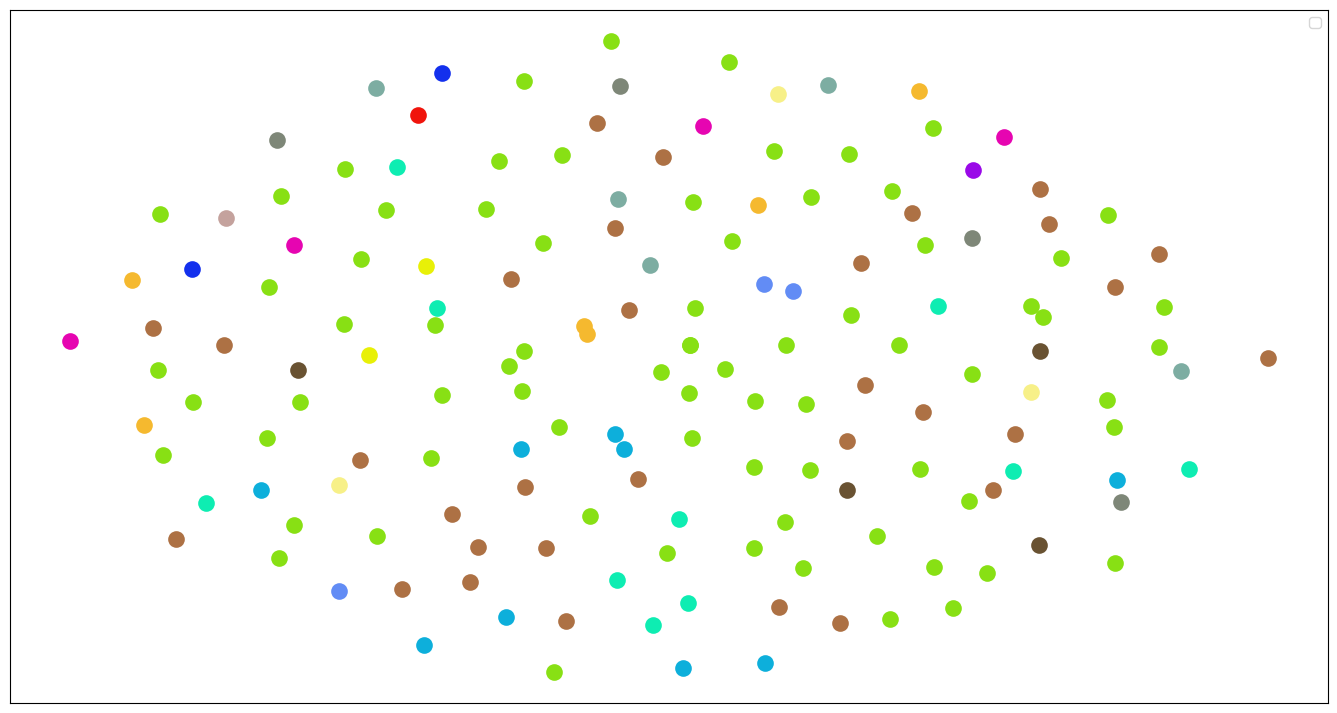

In [49]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
        #    label=cluster_names[name], 
            color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelleft=False)
    
ax.legend(numpoints=1)  #show legend with only 1 point
    
    
plt.show() #show the plot
